اضافه کردن کتابخانه‌ها

In [1]:
import numpy as np
from scipy.spatial.distance import cdist 

پیاده‌سازی تابع الگوریتم اصلی

In [2]:
def kmeans(x, k, n_iterations):
    centroids = x[np.random.choice(len(x), k, replace=False), :]
     
    points = np.array([np.argmin(i) for i in cdist(x, centroids ,'euclidean')])
    
    for it in range(n_iterations): 
        centroids = []
        for i in range(k):
            centroids.append(x[points == i].mean(axis=0))
 
        centroids = np.vstack(centroids)
        
        points = np.array([np.argmin(i) for i in cdist(x, centroids ,'euclidean')])
         
    return points, centroids

فراخوانی داده‌ها

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

نمایش نقاط روی نمودار

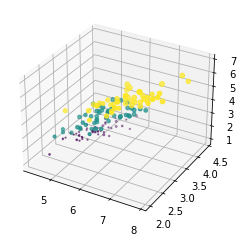

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10*X[:, 3], c=y)

In [12]:
result, cents = kmeans(X, 3, 100)
cents

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

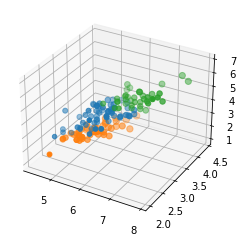

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for l in np.unique(result):
    ax.scatter(X[result == l, 0], X[result == l, 1], X[result == l, 2], s=10*X[result == l, 1])

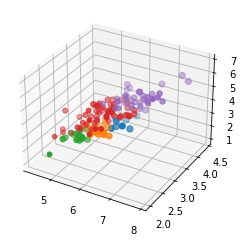

In [14]:
result, cents = kmeans(X, 5, 100)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for l in np.unique(result):
    ax.scatter(X[result == l, 0], X[result == l, 1], X[result == l, 2], s=10*X[result == l, 1])

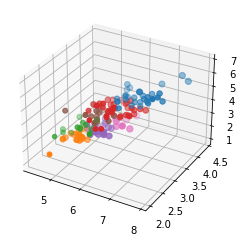

In [15]:
result, cents = kmeans(X, 7, 100)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for l in np.unique(result):
    ax.scatter(X[result == l, 0], X[result == l, 1], X[result == l, 2], s=10*X[result == l, 1])

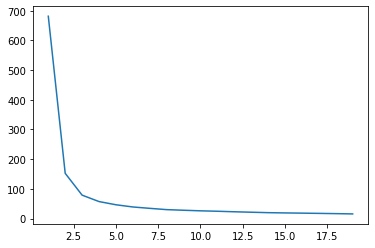

In [16]:
from sklearn.cluster import KMeans
elbow = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 20), elbow)